<a href="https://colab.research.google.com/github/guard1000/NLP_MCC/blob/master/3_just_tfidf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy

In [2]:
# 파일 읽어오기
# shuffle 된 뉴스 크롤링 데이터. 
# 뉴스기사 71321건
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/data/Article_shuffled.csv")
df.head()

,이해찬 민주당 단배식서 내년 총선 압승해 민주주의 정착 새해 첫날인 1일 여권은 집권 3년 차를 맞은 문재인 정부의 성공을 기원하며 내부 결속 의지를 다졌다. 특히 여당인 더불어민주당은 2020년 총선 압승 을 발판으로 2022년 정권 재창출 을 이뤄내겠다고 다짐했다. 문희상 국회의장은 이날 서울 한남동 의장 공관에서 신년 기자간담회를 열고 집권 3년 차는 아주 중요한 전기 라고 했다. 그러면서 올해를 황금돼지해라고 부르는데 저는 검은 돼지든 흰 돼지든 무게만 나가면 된다고 생각한다 며 흑돈백돈 黑豚白豚 론 을 펼쳤다. 중국 덩샤오핑의 흑묘백묘론 검은 고양이든 흰 고양이든 쥐만 잘 잡으면 된다 을 차용해 올해 경제 발전이 가장 중요한 과제라는 점을 강조한 것으로 해석됐다. 문 의장은 황금으로 누런 돼지라고 하면 이건 정말 대박 이라며 번영의 돼지해에 문재인 정부도 성공하고 우리도 성공하는 한 해가 되길 바란다 고 했다. 민주당은 이날 여의도 당사에서 신년인사회를 겸한 단배식을 열었다. 이해찬 대표는 재작년에는 정권 교체를 이뤘고 작년에는 지방선거에서 민주당이 압도적 승리를 거뒀다 며 이것을 기반으로 내년 총선에서 아주 크게 압승하는 정치적 성과를 올려야 한다 고 했다. 이 대표는 총선에서 크게 이기는 게 이 나라 민주주의를 정착시키는 데 아주 중요한 과업 이라며 그래야 2022년 대선에서 정권을 재창출해 민주당이 평화와 민주주의를 지키는 마지막 보루가 될 수 있다 고 했다. 이 대표는 남북 관계와 관련해 지난해 70년 분단 체제에서 평화 체제로 전환되는 역사적 한 획을 그었다 며 아마 남북 정상회담이 올해 일찍 열릴 가능성이 크다 고 했다. 경제 문제에 대해선 어렵다곤 하지만 조금씩은 나아지고 있다 고 했다. 그러자 홍영표 원내대표는 맞바람을 향해 돛을 펼친다 는 역풍장범 逆風張帆 이라는 말이 있다 며 앞으로도 많은 시련과 도전이 기다리고 있다. 이 대표를 중심으로 더욱 단결하는 한 해가 되도록 하자 고 했다. 민주당 지도부는 이날 오전 서울 국립현충원에서 김영삼·김대중 전 대통령 묘역을 참배했다. 이어 이승만·박정희 전 대통령 묘역도 찾았으나 일부 시민이 어떻게 박 전 대통령 묘역에 인사할 수 있나. 부끄럽지도 않으냐 고 항의해 분위기가 일순간 얼어붙기도 했다. 오후에는 경남 김해 봉하마을을 방문해 노무현 전 대통령 묘역을 참배했다.,정치
0,지난해 서울 아파트값이 2006년 이후 가장 큰 폭으로 상승했습니다. 2일 한국감정...,경제
1,의왕 연합뉴스 김인유 기자 경기 의왕시는 경로당 어르신들의 건강을 전문적으로 돌보는...,생활문화
2,한민수 기자 이번에 샌프란시스코에서 선언할 것은 직접판매 체계의 구축입니다. 지난해...,IT과학
3,JTBC ‘2019년 한국 어디로 가나’ 신년 토론. 사진 JTBC 방송화면 캡처 ...,정치
4,고려대 온라인 커뮤니티 고파스에 올라온 손혜원 더불어민주당 의원에 18원의 후원금을...,정치


In [3]:
# 기사 중 일부로 mini_data 생성
df_mini = df.iloc[:10000]
df_mini.shape

(10000, 2)

In [4]:
df_mini.head()

,이해찬 민주당 단배식서 내년 총선 압승해 민주주의 정착 새해 첫날인 1일 여권은 집권 3년 차를 맞은 문재인 정부의 성공을 기원하며 내부 결속 의지를 다졌다. 특히 여당인 더불어민주당은 2020년 총선 압승 을 발판으로 2022년 정권 재창출 을 이뤄내겠다고 다짐했다. 문희상 국회의장은 이날 서울 한남동 의장 공관에서 신년 기자간담회를 열고 집권 3년 차는 아주 중요한 전기 라고 했다. 그러면서 올해를 황금돼지해라고 부르는데 저는 검은 돼지든 흰 돼지든 무게만 나가면 된다고 생각한다 며 흑돈백돈 黑豚白豚 론 을 펼쳤다. 중국 덩샤오핑의 흑묘백묘론 검은 고양이든 흰 고양이든 쥐만 잘 잡으면 된다 을 차용해 올해 경제 발전이 가장 중요한 과제라는 점을 강조한 것으로 해석됐다. 문 의장은 황금으로 누런 돼지라고 하면 이건 정말 대박 이라며 번영의 돼지해에 문재인 정부도 성공하고 우리도 성공하는 한 해가 되길 바란다 고 했다. 민주당은 이날 여의도 당사에서 신년인사회를 겸한 단배식을 열었다. 이해찬 대표는 재작년에는 정권 교체를 이뤘고 작년에는 지방선거에서 민주당이 압도적 승리를 거뒀다 며 이것을 기반으로 내년 총선에서 아주 크게 압승하는 정치적 성과를 올려야 한다 고 했다. 이 대표는 총선에서 크게 이기는 게 이 나라 민주주의를 정착시키는 데 아주 중요한 과업 이라며 그래야 2022년 대선에서 정권을 재창출해 민주당이 평화와 민주주의를 지키는 마지막 보루가 될 수 있다 고 했다. 이 대표는 남북 관계와 관련해 지난해 70년 분단 체제에서 평화 체제로 전환되는 역사적 한 획을 그었다 며 아마 남북 정상회담이 올해 일찍 열릴 가능성이 크다 고 했다. 경제 문제에 대해선 어렵다곤 하지만 조금씩은 나아지고 있다 고 했다. 그러자 홍영표 원내대표는 맞바람을 향해 돛을 펼친다 는 역풍장범 逆風張帆 이라는 말이 있다 며 앞으로도 많은 시련과 도전이 기다리고 있다. 이 대표를 중심으로 더욱 단결하는 한 해가 되도록 하자 고 했다. 민주당 지도부는 이날 오전 서울 국립현충원에서 김영삼·김대중 전 대통령 묘역을 참배했다. 이어 이승만·박정희 전 대통령 묘역도 찾았으나 일부 시민이 어떻게 박 전 대통령 묘역에 인사할 수 있나. 부끄럽지도 않으냐 고 항의해 분위기가 일순간 얼어붙기도 했다. 오후에는 경남 김해 봉하마을을 방문해 노무현 전 대통령 묘역을 참배했다.,정치
0,지난해 서울 아파트값이 2006년 이후 가장 큰 폭으로 상승했습니다. 2일 한국감정...,경제
1,의왕 연합뉴스 김인유 기자 경기 의왕시는 경로당 어르신들의 건강을 전문적으로 돌보는...,생활문화
2,한민수 기자 이번에 샌프란시스코에서 선언할 것은 직접판매 체계의 구축입니다. 지난해...,IT과학
3,JTBC ‘2019년 한국 어디로 가나’ 신년 토론. 사진 JTBC 방송화면 캡처 ...,정치
4,고려대 온라인 커뮤니티 고파스에 올라온 손혜원 더불어민주당 의원에 18원의 후원금을...,정치


In [5]:
# 기사 내용을 Query로, 분류를 GT로 바꿔주자
df_mini.rename(columns={'이해찬 민주당 단배식서 내년 총선 압승해 민주주의 정착 새해 첫날인 1일 여권은 집권 3년 차를 맞은 문재인 정부의 성공을 기원하며 내부 결속 의지를 다졌다. 특히 여당인 더불어민주당은 2020년 총선 압승 을 발판으로 2022년 정권 재창출 을 이뤄내겠다고 다짐했다. 문희상 국회의장은 이날 서울 한남동 의장 공관에서 신년 기자간담회를 열고 집권 3년 차는 아주 중요한 전기 라고 했다. 그러면서 올해를 황금돼지해라고 부르는데 저는 검은 돼지든 흰 돼지든 무게만 나가면 된다고 생각한다 며 흑돈백돈 黑豚白豚 론 을 펼쳤다. 중국 덩샤오핑의 흑묘백묘론 검은 고양이든 흰 고양이든 쥐만 잘 잡으면 된다 을 차용해 올해 경제 발전이 가장 중요한 과제라는 점을 강조한 것으로 해석됐다. 문 의장은 황금으로 누런 돼지라고 하면 이건 정말 대박 이라며 번영의 돼지해에 문재인 정부도 성공하고 우리도 성공하는 한 해가 되길 바란다 고 했다. 민주당은 이날 여의도 당사에서 신년인사회를 겸한 단배식을 열었다. 이해찬 대표는 재작년에는 정권 교체를 이뤘고 작년에는 지방선거에서 민주당이 압도적 승리를 거뒀다 며 이것을 기반으로 내년 총선에서 아주 크게 압승하는 정치적 성과를 올려야 한다 고 했다. 이 대표는 총선에서 크게 이기는 게 이 나라 민주주의를 정착시키는 데 아주 중요한 과업 이라며 그래야 2022년 대선에서 정권을 재창출해 민주당이 평화와 민주주의를 지키는 마지막 보루가 될 수 있다 고 했다. 이 대표는 남북 관계와 관련해 지난해 70년 분단 체제에서 평화 체제로 전환되는 역사적 한 획을 그었다 며 아마 남북 정상회담이 올해 일찍 열릴 가능성이 크다 고 했다. 경제 문제에 대해선 어렵다곤 하지만 조금씩은 나아지고 있다 고 했다. 그러자 홍영표 원내대표는 맞바람을 향해 돛을 펼친다 는 역풍장범 逆風張帆 이라는 말이 있다 며 앞으로도 많은 시련과 도전이 기다리고 있다. 이 대표를 중심으로 더욱 단결하는 한 해가 되도록 하자 고 했다. 민주당 지도부는 이날 오전 서울 국립현충원에서 김영삼·김대중 전 대통령 묘역을 참배했다. 이어 이승만·박정희 전 대통령 묘역도 찾았으나 일부 시민이 어떻게 박 전 대통령 묘역에 인사할 수 있나. 부끄럽지도 않으냐 고 항의해 분위기가 일순간 얼어붙기도 했다. 오후에는 경남 김해 봉하마을을 방문해 노무현 전 대통령 묘역을 참배했다.' : 'Query', '정치': 'GT'}, inplace=True)

'''
#바꾸는김에 그냥 GT도 숫자로 표기하자(0 ~ 6)
category_dic = {'IT과학' : 0, '경제' : 1, '사회' : 2, '생활문화' : 3, '세계' : 4,  '오피니언' : 5, '정치' : 6}
for i in range(len(df_mini)):
  df_mini.ix[i]['GT'] = category_dic[df_mini.ix[i]['GT']]
'''
display(df_mini.head())


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Query,GT
0,지난해 서울 아파트값이 2006년 이후 가장 큰 폭으로 상승했습니다. 2일 한국감정...,경제
1,의왕 연합뉴스 김인유 기자 경기 의왕시는 경로당 어르신들의 건강을 전문적으로 돌보는...,생활문화
2,한민수 기자 이번에 샌프란시스코에서 선언할 것은 직접판매 체계의 구축입니다. 지난해...,IT과학
3,JTBC ‘2019년 한국 어디로 가나’ 신년 토론. 사진 JTBC 방송화면 캡처 ...,정치
4,고려대 온라인 커뮤니티 고파스에 올라온 손혜원 더불어민주당 의원에 18원의 후원금을...,정치


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_

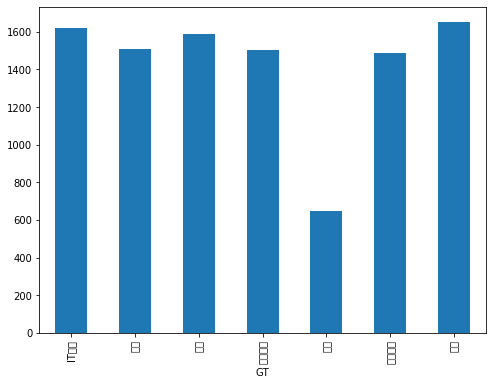

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,6))
df_mini.groupby('GT').Query.count().plot.bar(ylim=0)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = ['의','가','이','은','들','는','좀','것', '잘','걍','과','도','를','으로','자','에','와','한','하다']

tfidf = TfidfVectorizer(sublinear_tf= True, # 서브리니어로 스무딩 적용
                       min_df = 5, # 문서에서 5번 이상 나타난 애들만
                       norm= 'l2', #유클리드 정규화
                       ngram_range= (1,2), #2 단어 연결까지 처리
                       stop_words = stopwords) #불용어 처리 더 잘해보자

In [0]:
features = tfidf.fit_transform(df_mini.Query).toarray()

In [9]:
features.shape

(10000, 73979)

In [0]:
labels = df_mini.GT

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(df_mini['Query'], df_mini['GT'], random_state= 0)
count_vect = CountVectorizer()


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [0]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)


In [14]:
from sklearn import metrics
y_pred = clf.predict(count_vect.transform(X_test))
print(metrics.classification_report(y_test,y_pred, labels= df_mini.GT, target_names=df_mini['GT'].unique()))


              precision    recall  f1-score   support

          경제       0.73      0.74      0.74       373
        생활문화       0.88      0.57      0.69       381
        IT과학       0.82      0.82      0.82       422
          정치       0.74      0.85      0.79       400
          사회       0.74      0.85      0.79       400
          세계       0.75      0.77      0.76       400
        오피니언       0.79      0.85      0.82       156

    accuracy                           0.78   3761376
   macro avg       0.79      0.78      0.78   3761376
weighted avg       0.79      0.78      0.78   3761376



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1989: UserWarning: labels size, 10000, does not match size of target_names, 7
  .format(len(labels), len(target_names))
